Analysis and comparison of the (non-optical) industrial plate and (optical) commerical mirror

In [2]:
from pypylon import pylon
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import math
import scipy

# Reflectivity

In [3]:
# Using camera: finding brightness of each reflection after removing noise

data = np.load("mirrors.npz")
alumLaser = data["alumLaser"]
alumNo = data["alumNo"]
mirrorLaser = data["mirrorLaser"]
mirrorNo = data["mirrorNo"]

print("Square Aluminum: ")

sumNo=0
for i in range(len(alumNo)):
    for j in range(len(alumNo[0])):
        sumNo = int(sumNo) + alumNo[i][j]
print("no laser: " + str(sumNo))

sumYes=0
for i in range(len(alumLaser)):
    for j in range(len(alumLaser[0])):
        sumYes = int(sumYes) + alumLaser[i][j]     
print("with laser: " + str(sumYes))

print("intensity diff: " + str(int(sumYes)-int(sumNo)))

print(" ")
print("Optical Mirror: ")

sumNo=0
for i in range(len(mirrorNo)):
    for j in range(len(mirrorNo[0])):
        sumNo = int(sumNo) + mirrorNo[i][j]
print("no laser: " + str(sumNo))

sumYes=0
for i in range(len(mirrorLaser)):
    for j in range(len(mirrorLaser[0])):
        sumYes = int(sumYes) + mirrorLaser[i][j]     
print("with laser: " + str(sumYes))

print("intensity diff: " + str(int(sumYes)-int(sumNo)))

Square Aluminum: 
no laser: 1283172827
with laser: 1297322886
intensity diff: 14150059
 
Optical Mirror: 
no laser: -2145459817
with laser: -2136609948
intensity diff: 8849869


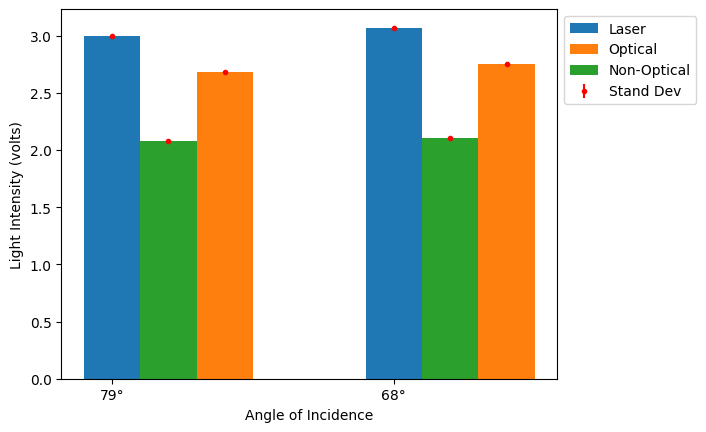

In [35]:
# Using photodiode: finding light intensity of each reflection

from statistics import mean 

laser79 = [2.987, 2.997, 3.002, 3.001, 3.011]
thor79 = [2.67, 2.67, 2.682, 2.685, 2.699]
alum79 = [2.062, 2.056, 2.077, 2.075, 2.109]

laser68 = [3.058, 3.065, 3.067, 3.075, 3.082]
thor68 = [2.752, 2.741, 2.735, 2.762, 2.764]
alum68 = [2.085, 2.085, 2.09, 2.147, 2.097]

yLas = [mean(laser79), mean(laser68)]
xLas = np.arange(len(yLas))

yThor = [mean(thor79), mean(thor68)]
xThor = np.arange(0.4, len(yThor)+0.4)

yAlum = [mean(alum79), mean(alum68)]
xAlum = np.arange(0.2, len(yAlum)+0.2)

plt.bar(xLas, yLas, width=0.2)
plt.bar(xThor, yThor, width=0.2)
plt.bar(xAlum, yAlum, width=0.2)

plt.errorbar(xLas, yLas, yerr=[np.std(laser79), np.std(laser68)], fmt=".", color="r")
plt.errorbar(xThor, yThor, yerr=[np.std(thor79), np.std(thor68)], fmt=".", color="r")
plt.errorbar(xAlum, yAlum, yerr=[np.std(alum79), np.std(alum68)], fmt=".", color="r")

plt.legend(['Laser', 'Optical', 'Non-Optical', 'Stand Dev'], bbox_to_anchor=(1, 1))

plt.xticks([0, 1], ["79°", "68°"])
plt.xlabel("Angle of Incidence")
plt.ylabel("Light Intensity (volts)")

plt.show()

Rounded Averages
 
Non-Optical Reflection: 95.0%
Optical Reflection: 78.0%


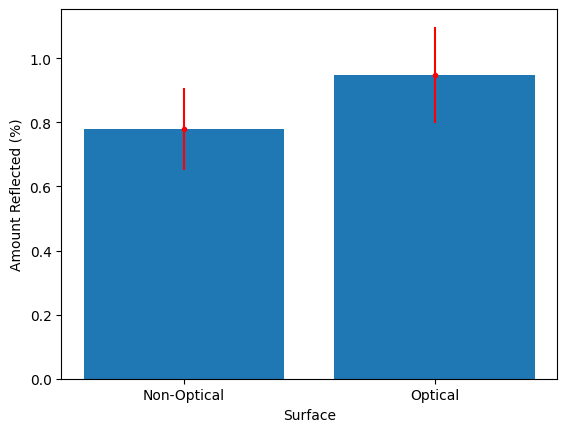

In [38]:
# Comparison after camera

from statistics import mean 

thorPerc = [0.8938525137, 0.896201212, 0.8934363525,1.344444444,0.8911333333, 0.8835674066, 0.9016767353, 0.8815651423]
alumPerc = [0.7208600036, 0.7129514998, 0.7382190942, 1.114084268, 0.7240277778, 0.7238609152, 0.729012555, 0.7726835565]

print("Rounded Averages")
print(" ")
print("Non-Optical Reflection: " + str(np.round(mean(thorPerc)*100)) + "%")
print("Optical Reflection: " + str(np.round(mean(alumPerc)*100)) + "%")

x = [1, 2]
y = [mean(alumPerc), mean(thorPerc)]
plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(alumPerc), np.std(thorPerc)], fmt=".", color="r")

plt.xticks([1, 2], ["Non-Optical", "Optical"])
plt.xlabel("Surface")
plt.ylabel("Amount Reflected (%)")

plt.show()

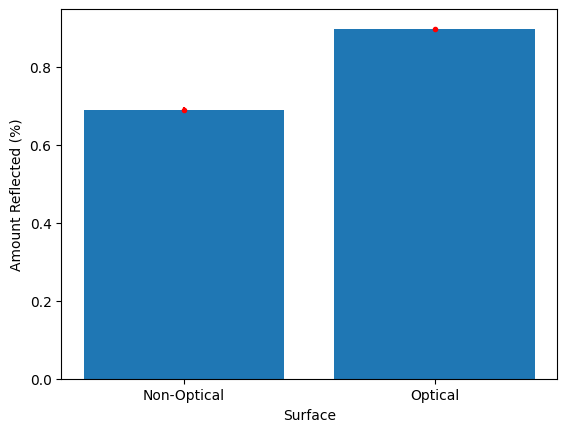

In [32]:
# Comparison after photodiode, averaging across angles/trials

from statistics import mean 

laser = [2.987, 2.997, 3.002, 3.001, 3.011, 3.058, 3.065, 3.067, 3.075, 3.082]
alum = [2.062, 2.056, 2.077, 2.075, 2.109, 2.085, 2.085, 2.09, 2.147, 2.097]
thor = [2.67, 2.67, 2.682, 2.685, 2.699, 2.752, 2.741, 2.735, 2.762, 2.764]

percAlum = [alum[i]/laser[i] for i in range(len(laser))]
percThor = [thor[i]/laser[i] for i in range(len(laser))]

x = [1,2]
y = [mean(percAlum), mean(percThor)]

plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(percAlum), np.std(percAlum)], fmt=".", color="r")

plt.xticks([1, 2], ["Non-Optical", "Optical"])
plt.xlabel("Surface")
plt.ylabel("Amount Reflected (%)")

plt.show()

# TIS (Total Integrated Scatter)

0.003375416167119408 0.052367081765672535


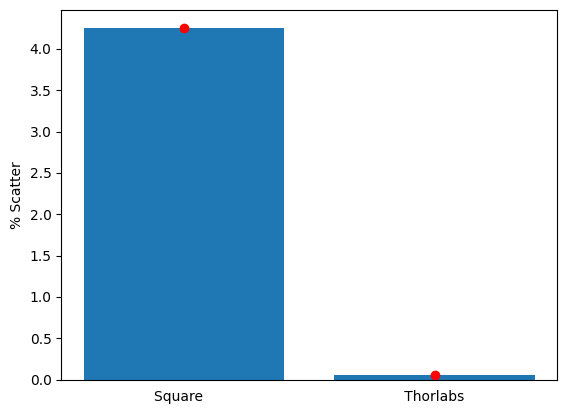

In [39]:
# Comparison with photodiode

from statistics import mean 

laserAvg = 476004592.0151515

squareInten = [i/laserAvg for i in [20248270.8, 20273961, 20222933, 20255660, 20253410, 20235390]]
opticalInten = [i/laserAvg for i in [419207, 383736, 415917, -225444, 363441]]

x = [1, 2]
y = [mean(squareInten)*100, mean(opticalInten)*100]
plt.bar(x, y)

square_sdev = np.std(squareInten)*100
optical_sdev = np.std(opticalInten)*100
print(square_sdev, optical_sdev)

plt.errorbar(x, y, yerr=[square_sdev, optical_sdev], fmt="o", color="r")
plt.xticks([])
plt.xlabel("Square                                              Thorlabs")
plt.ylabel("% Scatter")

plt.show()